## Redes Neurais Artificiais 2022.2

#### Atividade Avaliativa 2.3

- **Disciplina**: Redes Neurais Artificiais 2022.2

- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)

- **Github**: https://github.com/jo-alves01/rna-aa3


Sobre a base de dados:

O dataset "Maternal Health Risk Data Set" contém informações relacionadas à saúde materna e risco de complicações durante a gestação. As variáveis do conjunto de dados incluem informações como idade, além de dados clínicos, como pressão arterial e níveis de glicose no sangue.

#### Equipe:

Carlos Gabriel da Silva Machado - 1815080079

Davi Rodrigues de França - 1915080053

Gabriella Rabelo Monteiro - 1915080011

Josué Costa dos Santos Alves - 1715080615

Victor Hugo Santos de Lima - 1915080025

## Bibliotecas

In [333]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

## Funções úteis

In [334]:
def plot_hist_box(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"Histograma de {col}")
    ax[1].set_title(f"Boxplot de {col}")

    plt.show()

## Leitura do Dataset

In [335]:
mhr_dataset_base = pd.read_csv("./maternal_health_risk_data_set.csv")

In [336]:
mhr_dataset_base.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [337]:
mhr_dataset_base.rename(columns={"BS": "BloodSugar"}, inplace=True)
mhr_dataset_base.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


## Apresentação do dataset

O dataset possui 7 atribuitos no total, sendo eles:


*   **Age**: Idade da mulher;
*   **SystolicBP**: Valor superior da pressão arterial em mmHg;
*   **DiastolicBP**: Valor mais baixo da pressão arterial em mmHg;
*   **BS**: Os níveis de glicose no sangue, em termos de uma concentração molar (mmol/L);
*   **BodyTemp**: Temperatura corporal da mulher (em °F);
*   **HeartRate**: Uma frequência cardíaca normal em repouso em batimentos por minuto;
*   **Risk Level**: Nível de intensidade de risco previsto durante a gravidez.

Os tipos dos dados são: Age: inteiro, SystolicBP: inteiro, DiastolicBP: inteiro, BS: float, BodyTemp: float, HeartRate: inteiro, RiskLevel: objeto.

As informações podem ser observadas abaixo:

In [338]:
mhr_dataset_base.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BloodSugar     float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [339]:
mhr_dataset_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BloodSugar   1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Verificação da quantidade de exemplos e atributos preditores

In [340]:
columns = len(mhr_dataset_base.axes[1])
rows = len(mhr_dataset_base.axes[0])

print("Quantidade de exemplo:",rows)
print("Quantidade de atributos preditores:",columns-1,)
print("Atributos preditores:",mhr_dataset_base.axes[1][0], mhr_dataset_base.axes[1][1], mhr_dataset_base.axes[1][2], mhr_dataset_base.axes[1][3], mhr_dataset_base.axes[1][4], mhr_dataset_base.axes[1][5])
print("Quantidade de atributos alvo:", columns-(columns-1))
print("Atributo alvo:",mhr_dataset_base.axes[1][6])

Quantidade de exemplo: 1014
Quantidade de atributos preditores: 6
Atributos preditores: Age SystolicBP DiastolicBP BloodSugar BodyTemp HeartRate
Quantidade de atributos alvo: 1
Atributo alvo: RiskLevel


Checando se existem dados faltantes no dataset:

In [341]:
mhr_dataset_base.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BloodSugar     0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Verificando quantos exemplos existem para cada classe do atributo alvo:

In [342]:
mhr_dataset_base['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

Abaixo pode-se observar alguns dados gerais sobre o dataset:

In [343]:
mhr_dataset_base.describe()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Abaixo é possível observar a distribuição dos dados dentro do dataset

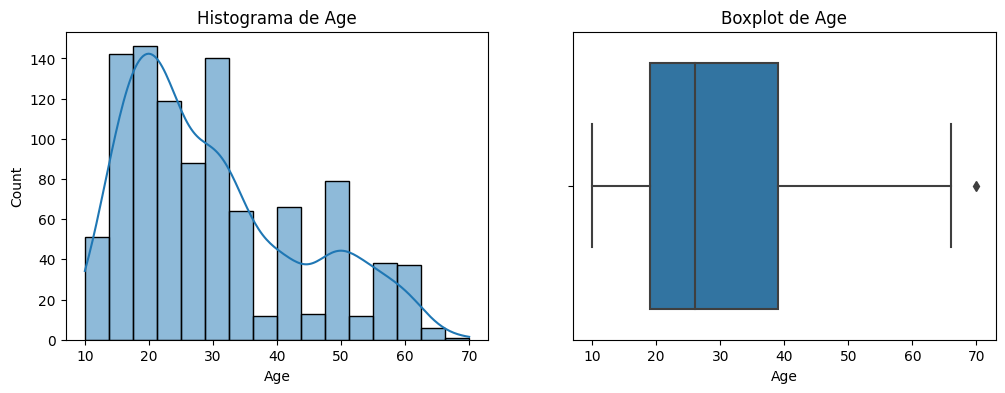

In [344]:
plot_hist_box(mhr_dataset_base, 'Age')

É possível observar que o atributo Age possui sua mediana em torno de 26 anos e que existem muitos exemplos entre os valores de 20 até 35 anos, enquanto valores maiores e menores que esse intervalo possuem poucos exemplos.

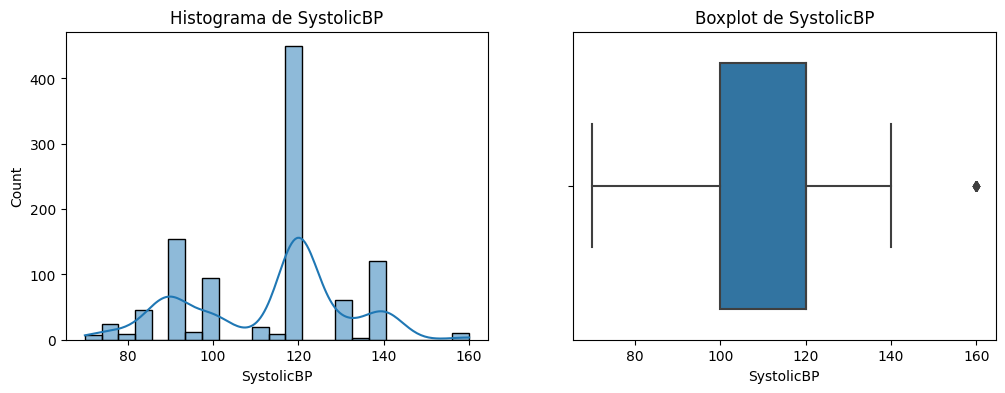

In [345]:
plot_hist_box(mhr_dataset_base, 'SystolicBP')

Ao examinar os gráficos acima, pode-se afirmar que a mediana do atributo SystolicBP é em torno de 120, com uma grande quantidade de exemplos na faixa de 100 até 120, além de verificar um pequeno grupo de exemplos entre os valores de 80 até 100, e entre 130 até 140. É também visível um *outlier* no valor 160.

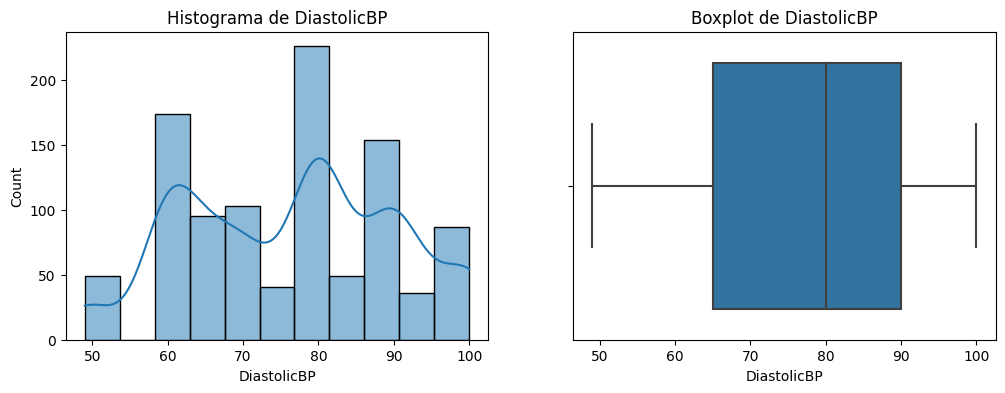

In [346]:
plot_hist_box(mhr_dataset_base, 'DiastolicBP')

O atributo DiastolicBP possui sua mediana em 80, com exemplos relativamente bem distribuídos, principalmente na faixa entre 65 e 90.

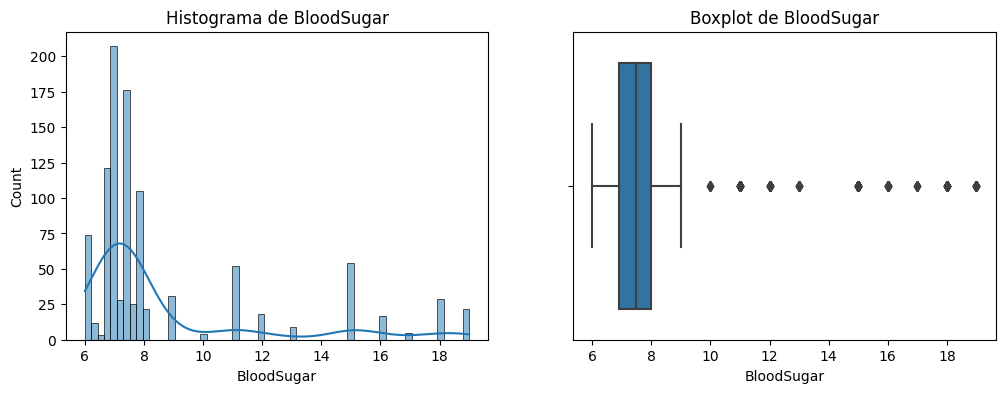

In [347]:
plot_hist_box(mhr_dataset_base, 'BloodSugar')

Diferente do atributo DiastolicBP, o atributo BloodSugar possui exemplos dispersos, com sua grande maioria entre os valores de 7 e 8, sua mediana é em torno de 7,5. É bastante visível os diversos *outliers* existentes neste atributo.

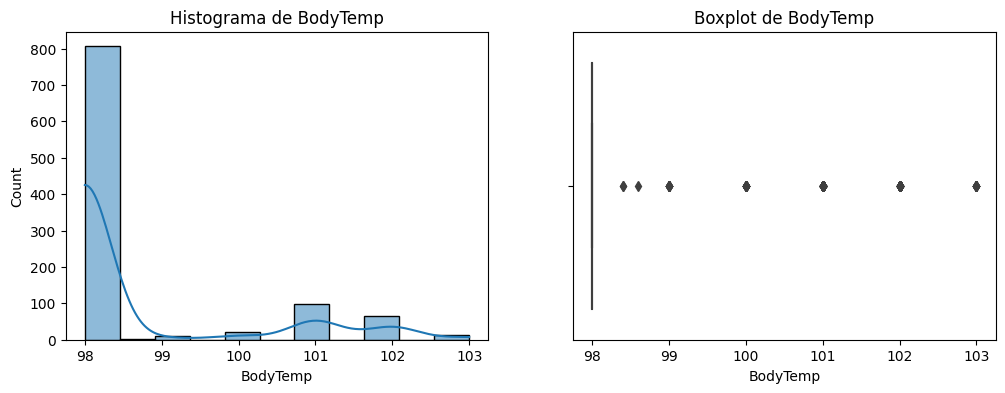

In [348]:
plot_hist_box(mhr_dataset_base, 'BodyTemp')

É notável a dispariedade dos valores dos exemplos do atributo BodyTemp, com sua mediana e a maioria dos exemplos com valor 98, e os outro valores sendo considerados quase *outliers*, apesar de estarem próximo do valor 98.

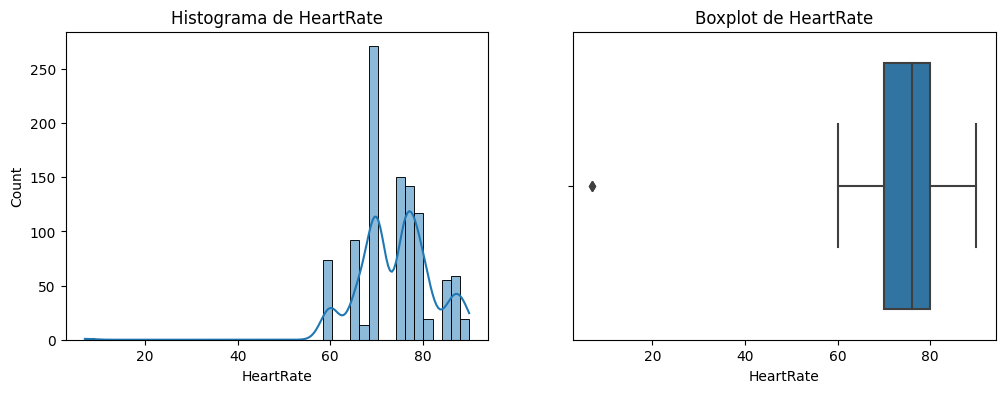

In [349]:
plot_hist_box(mhr_dataset_base, 'HeartRate')

Por último, o atributo HeartRate possui a maioria dos seus exemplos entre 70 e 80, e sua mediana é de aproximadamente 75. É possível obervar a existência de um *outlier* próximo do valor 10.

## Preparação dos dados

### Categorização dos dados

In [350]:
dummies = pd.get_dummies(mhr_dataset_base["RiskLevel"])
mhr_dataset_wo_risk_level = mhr_dataset_base.drop(["RiskLevel"], axis=1)

mhr_dataset_final = pd.concat([mhr_dataset_wo_risk_level, dummies], axis=1)
mhr_dataset_final.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,high risk,low risk,mid risk
0,25,130,80,15.0,98.0,86,1,0,0
1,35,140,90,13.0,98.0,70,1,0,0
2,29,90,70,8.0,100.0,80,1,0,0
3,30,140,85,7.0,98.0,70,1,0,0
4,35,120,60,6.1,98.0,76,0,1,0


## Separando a base de dados em atributos preditores e alvos

In [351]:
X = mhr_dataset_final.drop(columns=["high risk","low risk","mid risk"],axis=1)
y = mhr_dataset_final[["high risk","low risk","mid risk"]]

## Realizando a normalização dos dados

In [352]:
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_norm.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325


In [353]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [354]:
mlp = MLPClassifier( activation='relu', solver='adam', learning_rate_init=0.001, max_iter=300,verbose=True, random_state=42)

In [355]:
pipe = Pipeline([('mlp', mlp)])
param_grid = {
    'mlp__hidden_layer_sizes': [9,8],
    'mlp__activation': ['relu'],
    'mlp__solver': ['adam'],
    'mlp__batch_size': [16],
    'mlp__beta_1': [0.999, 0.9, 0.8],
    'mlp__beta_2': [0.999, 0.95, 0.9],
    'mlp__n_iter_no_change': [25],
}
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1_micro')

In [356]:
grid.fit(X_train,y_train)

Iteration 1, loss = 20.26923907
Iteration 2, loss = 10.19843831
Iteration 3, loss = 9.82613384
Iteration 4, loss = 9.64742657
Iteration 5, loss = 10.52599277
Iteration 6, loss = 10.89426619
Iteration 7, loss = 10.16991178
Iteration 8, loss = 8.79563000
Iteration 9, loss = 7.74208236
Iteration 10, loss = 7.00316096
Iteration 11, loss = 6.19264287
Iteration 12, loss = 6.27966145
Iteration 13, loss = 6.85616504
Iteration 14, loss = 7.32062309
Iteration 15, loss = 7.31237898
Iteration 16, loss = 6.67566397
Iteration 17, loss = 5.48614063
Iteration 18, loss = 4.52700954
Iteration 19, loss = 4.45694441
Iteration 20, loss = 5.07258982
Iteration 21, loss = 5.36140035
Iteration 22, loss = 5.25091886
Iteration 23, loss = 4.61874329
Iteration 24, loss = 3.91679393
Iteration 25, loss = 3.57713223
Iteration 26, loss = 3.51381269
Iteration 27, loss = 3.40684833
Iteration 28, loss = 3.25036280
Iteration 29, loss = 3.19333002
Iteration 30, loss = 3.20886565
Iteration 31, loss = 3.16944860
Iteration 32

GridSearchCV(estimator=Pipeline(steps=[('mlp',
                                        MLPClassifier(max_iter=300,
                                                      random_state=42,
                                                      verbose=True))]),
             param_grid={'mlp__activation': ['relu'], 'mlp__batch_size': [16],
                         'mlp__beta_1': [0.999, 0.9, 0.8],
                         'mlp__beta_2': [0.999, 0.95, 0.9],
                         'mlp__hidden_layer_sizes': [9, 8],
                         'mlp__n_iter_no_change': [25],
                         'mlp__solver': ['adam']},
             scoring='f1_micro')

In [357]:
grid.best_estimator_

Pipeline(steps=[('mlp',
                 MLPClassifier(batch_size=16, beta_1=0.8, hidden_layer_sizes=9,
                               max_iter=300, n_iter_no_change=25,
                               random_state=42, verbose=True))])

In [358]:
grid.best_score_


0.5557853256560905

In [359]:
grid.cv_results_

{'mean_fit_time': array([2.24845462, 0.84586515, 0.29827065, 0.29998307, 0.28874679,
        0.29106565, 1.21180358, 2.2044601 , 1.02565536, 1.54500604,
        1.252739  , 1.46886692, 1.03029847, 2.24103174, 1.03042278,
        1.55630364, 1.37812667, 1.57988234]),
 'std_fit_time': array([0.06087052, 0.72131746, 0.02120982, 0.02471191, 0.01185676,
        0.01544981, 0.26930388, 0.04039978, 0.27182093, 0.37679526,
        0.44735552, 0.19395895, 0.2625457 , 0.01464616, 0.22565783,
        0.3696445 , 0.25084289, 0.24628114]),
 'mean_score_time': array([0.00438666, 0.00412798, 0.00398049, 0.00415015, 0.00407891,
        0.00421386, 0.00392537, 0.00456605, 0.00433235, 0.00469842,
        0.00465741, 0.00413122, 0.00409184, 0.00423398, 0.00414104,
        0.0042798 , 0.00435328, 0.00433588]),
 'std_score_time': array([0.00033892, 0.00024227, 0.00026034, 0.00033797, 0.00036744,
        0.00026818, 0.0003985 , 0.00105993, 0.00058881, 0.00061156,
        0.00046972, 0.00042116, 0.00046476, 